Dataset source: https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification

In [1]:
from google.colab import files

files.upload()

Saving spam.csv to spam (1).csv


{'spam.csv': b'v1,v2,,,\r\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\r\nham,Ok lar... Joking wif u oni...,,,\r\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\r\nham,U dun say so early hor... U c already then say...,,,\r\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\r\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xe5\xa31.50 to rcv",,,\r\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\r\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,\r\nspam,WINNER!! As a valued network customer you have been selected to rece

In [2]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', delimiter=',',encoding='latin-1')

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.columns = ['labels', 'text']
df.head()

labels                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
category = pd.get_dummies(df.labels)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='labels')
df_baru

text  ham  spam
0     Go until jurong point, crazy.. Available only ...    1     0
1                         Ok lar... Joking wif u oni...    1     0
2     Free entry in 2 a wkly comp to win FA Cup fina...    0     1
3     U dun say so early hor... U c already then say...    1     0
4     Nah I don't think he goes to usf, he lives aro...    1     0
...                                                 ...  ...   ...
5567  This is the 2nd time we have tried 2 contact u...    0     1
5568              Will Ì_ b going to esplanade fr home?    1     0
5569  Pity, * was in mood for that. So...any other s...    1     0
5570  The guy did some bitching but I acted like i'd...    1     0
5571                         Rofl. Its true to its name    1     0

[5572 rows x 3 columns]

In [6]:
teks = df_baru['text'].values
label = df_baru[['ham', 'spam']].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(teks, label, test_size=0.2)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)
 
sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [20]:
print(padded_test)

[[   0    0    0 ...  532    2  494]
 [   0    0    0 ...   98    7   89]
 [   0    0    0 ...    4  362   30]
 ...
 [   0    0    0 ...   43   42 1423]
 [   0    0    0 ...    0    0   47]
 [   0    0    0 ...  102  272  393]]


In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode='auto'
)

In [16]:
num_epochs = 30
history = model.fit(
    padded_latih, 
    Y_train, 
    epochs=num_epochs, 
    validation_data=(padded_test, Y_test), 
    callbacks = es,
    verbose=1)

Epoch 1/30
140/140 [==============================] - 9s 54ms/step - loss: 0.2367 - accuracy: 0.9161 - val_loss: 0.0564 - val_accuracy: 0.9865
Epoch 2/30
140/140 [==============================] - 8s 55ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0533 - val_accuracy: 0.9857
Epoch 3/30
140/140 [==============================] - 8s 56ms/step - loss: 0.0118 - accuracy: 0.9955 - val_loss: 0.0631 - val_accuracy: 0.9865
Epoch 4/30
140/140 [==============================] - 7s 53ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0749 - val_accuracy: 0.9865
Epoch 5/30
140/140 [==============================] - 7s 49ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0746 - val_accuracy: 0.9839
Epoch 5: early stopping


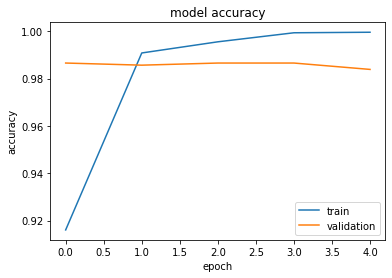

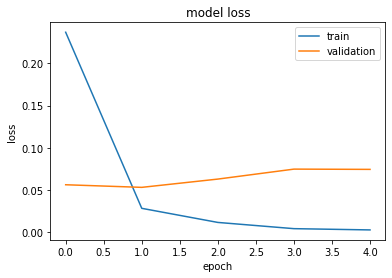

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
evaluate_test = model.evaluate(padded_test, Y_test, verbose=1)

print("\nAccuracy  =", "{:.5f}%".format(evaluate_test[1]*100))
print("Loss      =" ,"{:.7f}".format(evaluate_test[0]))

35/35 [==============================] - 1s 19ms/step - loss: 0.0746 - accuracy: 0.9839

Accuracy  = 98.38565%
Loss      = 0.0745656
